In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Read in excel file
#last row is total needs to be deleted
freq = pd.read_excel('Data.xlsx', sheet_name='city pairs - total flights', header=2)

In [3]:
#Initial EDA, check for null values
freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6373 entries, 0 to 6372
Data columns (total 2 columns):
Row Labels          6373 non-null object
Sum of Frequency    6373 non-null int64
dtypes: int64(1), object(1)
memory usage: 99.7+ KB


In [4]:
#Check for duplicate values
freq.duplicated().sum()

0

In [5]:
dep_arr = pd.read_excel('Data.xlsx', sheet_name='incl Dep-Arrival names', header=2)

In [6]:
# last two rows to be removed
dep_arr

,Row Labels,Dep City Name,Arr City Name,Sum of Frequency
0,MCM-NCE,Monaco,Nice,32447.0
1,NaN,Nice,Monaco,32285.0
2,LED-MOW,Moscow,St Petersburg,20097.0
3,NaN,St Petersburg,Moscow,20083.0
4,DUB-LON,Dublin,London (GB),17331.0
...,...,...,...,...
13306,AMS-LEJ,Amsterdam,Leipzig/Halle,1.0
13307,AAQ-SIP,Simferopol,Anapa,1.0
13308,ADA-ASR,Adana,Kayseri,1.0
13309,(blank),(blank),(blank),NaN


In [7]:
# null values in dep city name look to be duplicate departing cities as the cell above it with similar arrival city but a different airport (ex. Paris and Paris (FR) )
# Is this correct? I will fill in all null values accordingly to accurately answer the question of "most popular departing city"

## 1A:  "Display the most popular city for people to fly out (depart) from"

In [8]:
distance = pd.read_excel('Data.xlsx', sheet_name='2018EuropePairs0to1k_JobId11276')

In [9]:
dep = distance.groupby('Dep City Name')

In [10]:
pop_city = dep['Frequency'].sum().sort_values(ascending=False)

In [11]:
#The most popular city to depart from is shown below
pop_city.head(1)

Dep City Name
London (GB)    366464
Name: Frequency, dtype: int64

In [12]:
#Average amount of flights out of a particular city in 2018
np.mean(pop_city)

8384.011042944785

In [13]:
popularity = distance.groupby('Dep City Name',sort=False)['Frequency'].sum().reset_index(name='Total')

In [14]:
p_city=popularity.sort_values(by='Total',ascending=False)

In [15]:
# Top 20 most popular cities to depart from
top=p_city.head(20)
top

,Dep City Name,Total
23,London (GB),366464
66,Paris,223567
15,Istanbul,201980
16,Moscow,189453
110,Amsterdam,174667
7,Frankfurt,173727
10,Munich,163443
48,Milan,145975
186,Madrid,136107
37,Rome (IT),130727


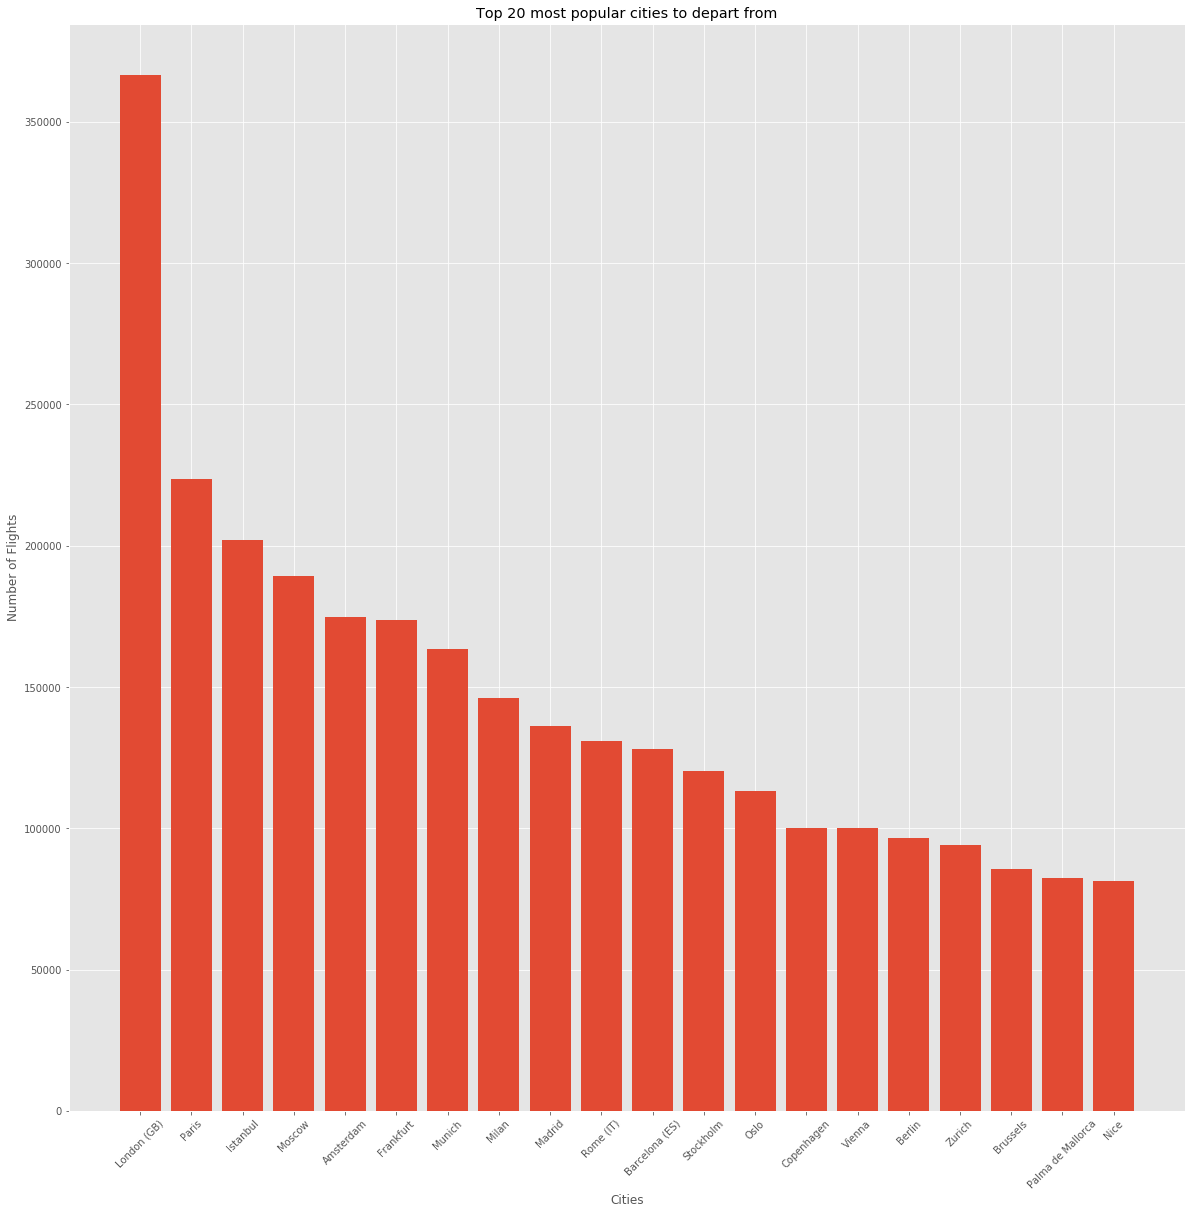

In [16]:
fig, ax = plt.subplots(figsize=(20,20))

ax.bar(top['Dep City Name'],top['Total'])
ax.set_title('Top 20 most popular cities to depart from')
ax.set_xticklabels(labels=top['Dep City Name'],rotation=45)
ax.set_xlabel('Cities')
ax.set_ylabel('Number of Flights');

In [17]:
# Graph above is assuming Dublin is seperate from Dublin (IE), Rome(IT) seperate from Rome, etc... the given dataset seperates these two thus I kept 
# these as seperate cities as well. This would be a clarifying question I would ask if given the opportunity.

## 1B:  "Which city has the lowest average distance of outgoing flights"

In [18]:
avg_dist=distance.groupby('Dep City Name',sort=False)['Distance(m)'].mean().reset_index(name='Distance')

In [19]:
avg_distance=avg_dist.sort_values(by='Distance').head(20)

In [20]:
# Lowest avg distance per city
avg_distance

,Dep City Name,Distance
814,Juist,4.500000
813,Monaco,11.000000
811,Stronsay,11.500000
812,Kasos Island,13.000000
805,Westray,14.000000
804,Papa Westray,14.666667
800,Norderney,15.000000
806,Sanday,15.000000
809,Eday,16.500000
808,Algeciras Rail Station,17.000000


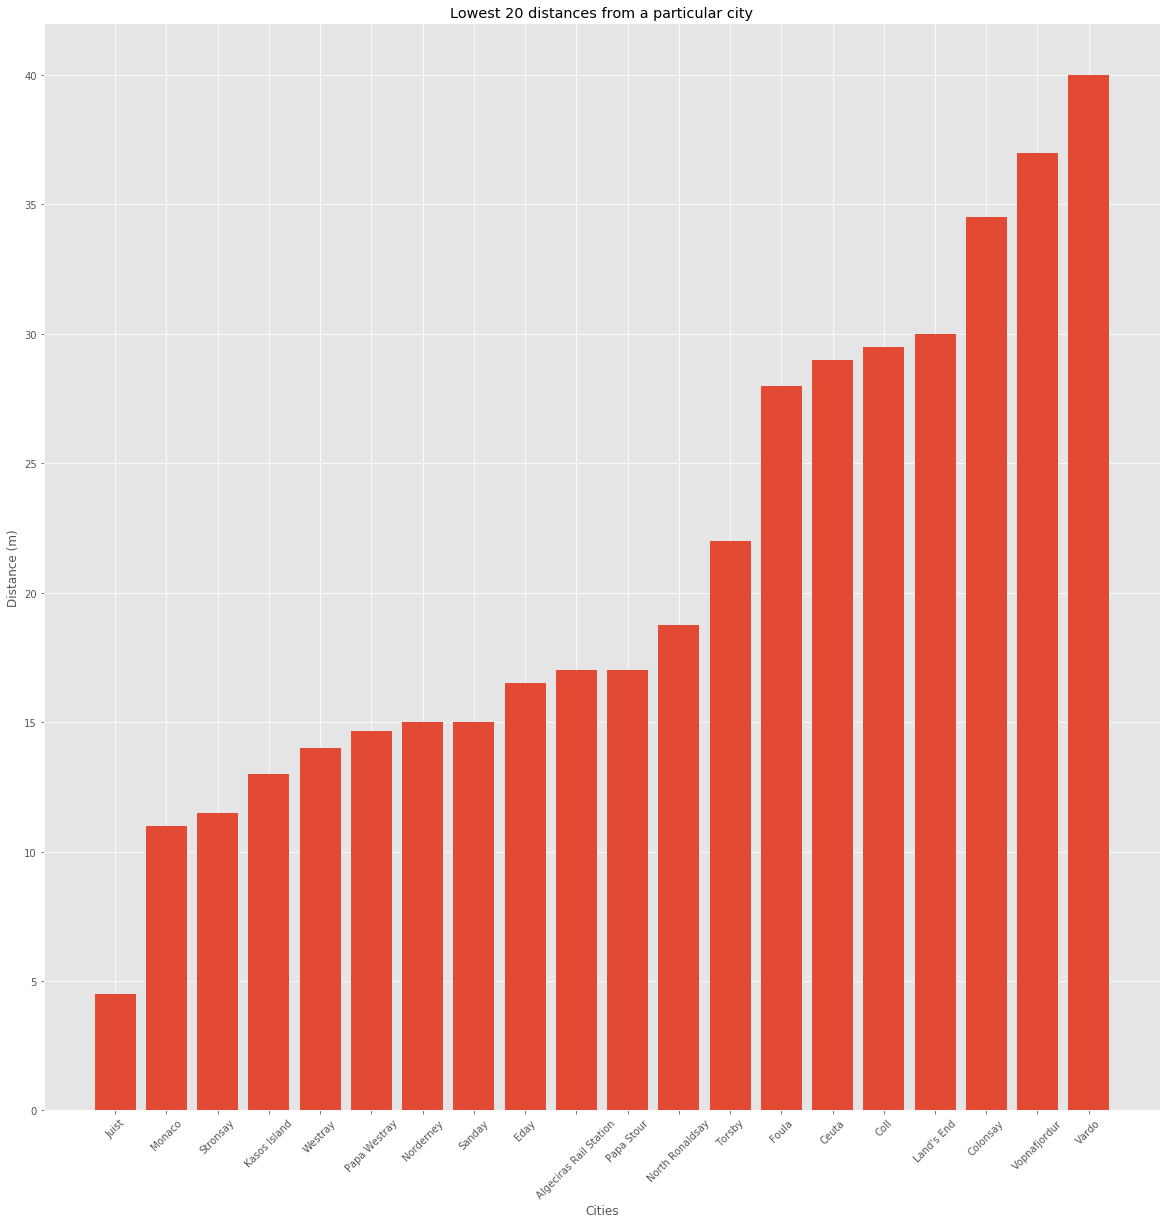

In [21]:
fig, ax = plt.subplots(figsize=(20,20))

ax.bar(avg_distance['Dep City Name'],avg_distance['Distance'])
ax.set_title('Lowest 20 distances from a particular city')
ax.set_xticklabels(labels=avg_distance['Dep City Name'],rotation=45)
ax.set_xlabel('Cities')
ax.set_ylabel('Distance (m)');

## BONUS:  More EDA on questions I was curious about

In Roei Ganzarski's speech at the 2019 WA State of Technology he mentioned that the goal for the Electric Propulsion System was to achieve a flight of 650 Miles. I want to know what is the highest frequency flight at a distance of 650 miles or under. This would tell us which cities would best be targeted to maximize profit and efficiency given the current compacity limits of the Electric Propulsion System.

In [22]:
d650 = distance[distance['Distance(m)'] <= 650]

In [23]:
under650 = d650.groupby('Dep City Name',sort=False)['Frequency'].sum().reset_index(name='Total')

In [24]:
u650 = under650.sort_values(by='Total',ascending=False).head(20)
u650

,Dep City Name,Total
7,London (GB),248549
79,Paris,164647
17,Istanbul,152906
1,Amsterdam,139033
62,Frankfurt,131443
99,Munich,127507
8,Milan,117822
245,Stockholm,90401
71,Copenhagen,87936
20,Oslo,86962


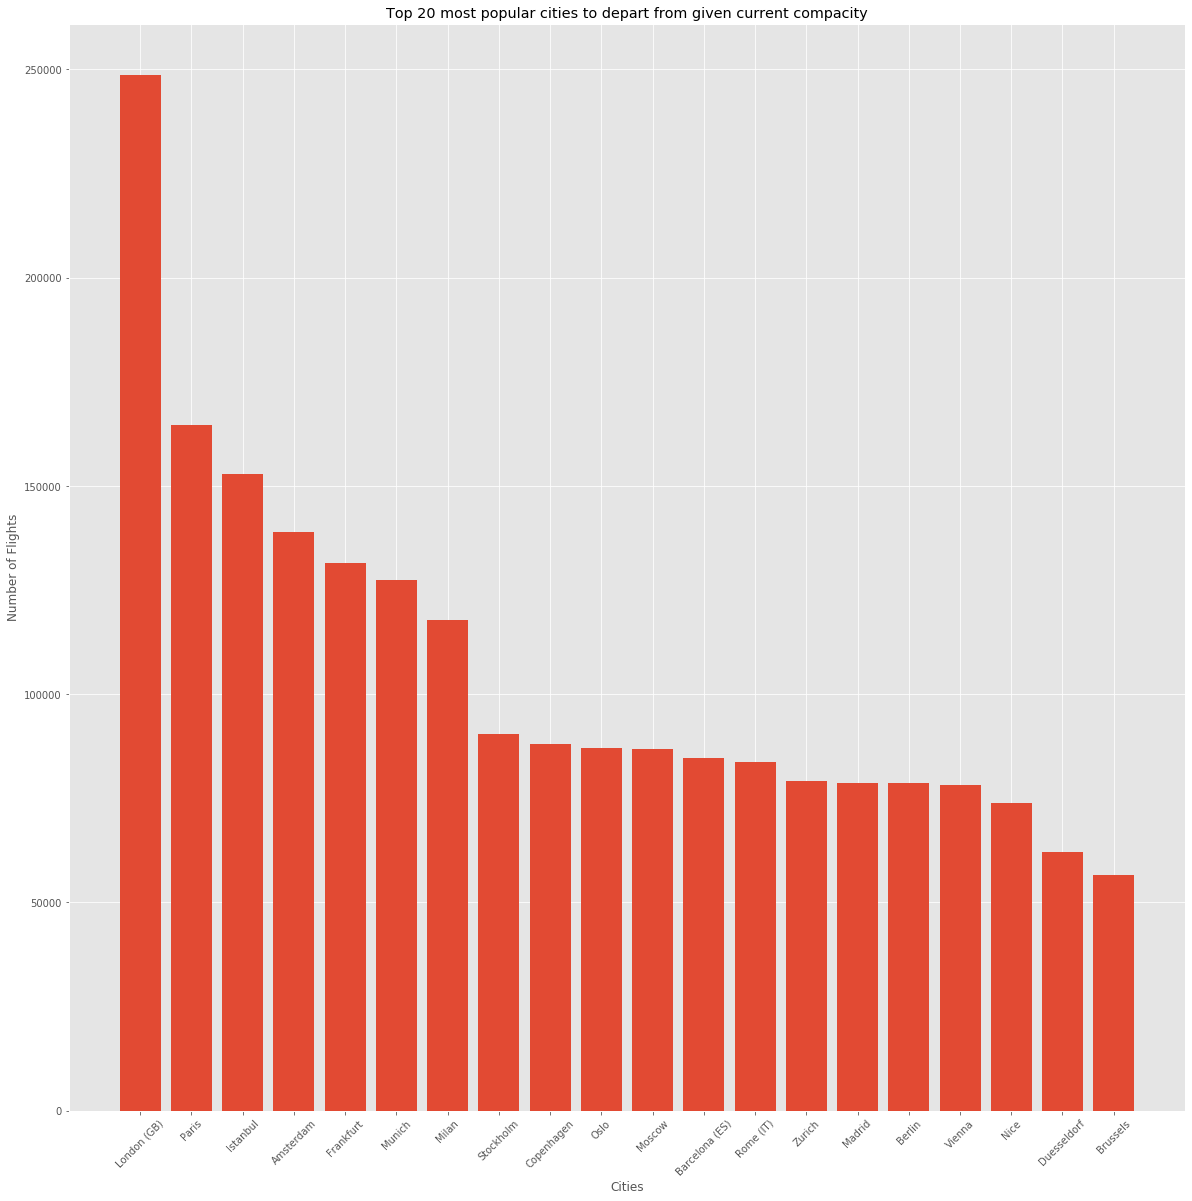

In [25]:
fig, ax = plt.subplots(figsize=(20,20))

ax.bar(u650['Dep City Name'],u650['Total'])
ax.set_title('Top 20 most popular cities to depart from given current compacity')
ax.set_xticklabels(labels=u650['Dep City Name'],rotation=45)
ax.set_xlabel('Cities')
ax.set_ylabel('Number of Flights');

Moscow is one of the biggest changes from the original question asked in part 1. About 100,000 more flights were flown out of moscow that were over 650 miles and under 1000 miles. Moscow should be one of the more targeted cities to expand too as the mileage capacity increases in the future.

## Question 2 A & B:  Sellenium webdriver to automate opening the aircraft type web page from flightaware.com and allows the user to insert any given airplane code

In [26]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import WebDriverException

In [33]:
def retrive_aircraft_information(airplane_code):
    '''
    INPUT: string - Aircraft Code
    '''
    # Using Chrome to access web
    driver = webdriver.Chrome('./chromedriver1')
    # Open the website
    driver.get('https://flightaware.com/live/aircrafttype/')
    
    # Path to textbox to insert given airplane_code
    airplane=driver.find_element_by_xpath("/html/body/div[3]/div[2]/form/div/input")
    airplane.send_keys(airplane_code)
    
    # Clicks button after airplane code is entered
    button=driver.find_element_by_xpath("/html/body/div[3]/div[2]/form/div/button")
    button.click()



In [34]:
#To answer the given question specifically, a list of the four aircrafts: Pilatus PC-12, Cessna Caravan, Beechcraft Super King Air 200, Cessna Citation Excel/ELS
airplane_types=['PC12','C208','BE20','C56X']
aircraft_avg_dict = {}

In [35]:
retrive_aircraft_information('SR22')

In [182]:
# Using Chrome to access web
driver = webdriver.Chrome('./chromedriver1')
    
def retrive_aircraft_information(airplane_code):
    '''
    INPUT: string - Aircraft Code
    '''
    # Open the website
    driver.get('https://flightaware.com/live/aircrafttype/')
    
    # Path to textbox to insert given airplane_code
    airplane=driver.find_element_by_xpath("/html/body/div[3]/div[1]/form/div/input")
    airplane.send_keys(airplane_code)
    
    # Clicks button after airplane code is entered
    button=driver.find_element_by_xpath("/html/body/div[3]/div[1]/form/div/button")
    button.click()

# Run this cell for four browsers to open for each aircraft listed above
for i in airplane_types:
    total_flight_time = 0
    number_of_flights = 0
    
    retrive_aircraft_information(i)
    content = driver.find_element_by_class_name("prettyTable")
    table_body = content.find_element_by_tag_name("tbody")
    flight_rows = table_body.find_elements_by_tag_name("tr")
    
    for flight in flight_rows:
        flight_information_columns = flight.find_elements_by_tag_name('td')
        flight_time = flight_information_columns[-1].text
        
        # Check for empty values
        if flight_time == '':
            continue
        else:
            duration = flight_time.split(':')
            hours = int(duration[0])
            minutes = int(duration[1])

            hours *= 60
            total = hours + minutes
            total_flight_time += total
            number_of_flights += 1

    # Error check to make sure at least one value was gathered.
        if number_of_flights == 0:
            print('No recorded flights')

    avg_flight_time = total_flight_time / number_of_flights
    
    aircraft_avg_dict[i] = avg_flight_time
    
print(aircraft_avg_dict)

{'PC12': 38.0, 'C208': 57.0, 'BE20': 52.84615384615385, 'C56X': 106.0}


## Question 2 Converting to XSLX

In [200]:
# Requests sends and recieves HTTP requests.
import requests
import urllib
# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

In [205]:
#C56X travel times
#Change url for each aircraft
r = requests.get('https://flightaware.com/live/aircrafttype/PC12')

In [206]:
soup = BeautifulSoup(r.content, "html")
div = soup.find("div", {"class": "pageContainer"})
table = div.find("table", {"class": "prettyTable fullWidth"})
# This returns an iterator over the rows in the table.
rows = table.find_all("tr")

In [207]:
all_rows =[]

empty_row = {
    "ident": None, "airplane_type": None, "origin" : None, "destination" : None, "departure" : None, "arrival" : None, "travel_time" : None
}

# The first two rows contains header information, so we are skipping it.
for row in rows[2:]:
    new_row = copy.copy(empty_row)
    # A list of all the entries in the row.
    ident = row.find_all("td")[0].text[1:]
    airplane_type = row.find_all("td")[1].text
    origin = row.find_all("td")[2].text
    destination = row.find_all("td")[3].text
    departure = row.find_all("td")[4].text
    arrival = row.find_all("td")[5].text
    travel_time = row.find_all("td")[6].text
    
    new_row['ident'] = ident
    new_row['airplane_type'] = airplane_type
    new_row['origin'] = origin
    new_row['destination'] = destination
    new_row['departure'] = departure
    new_row['arrival'] = arrival
    new_row['travel_time'] = travel_time
    
    all_rows.append(new_row) 

In [208]:
pc12=pd.DataFrame(data=all_rows)
pc12.to_excel('PC12.xlsx')

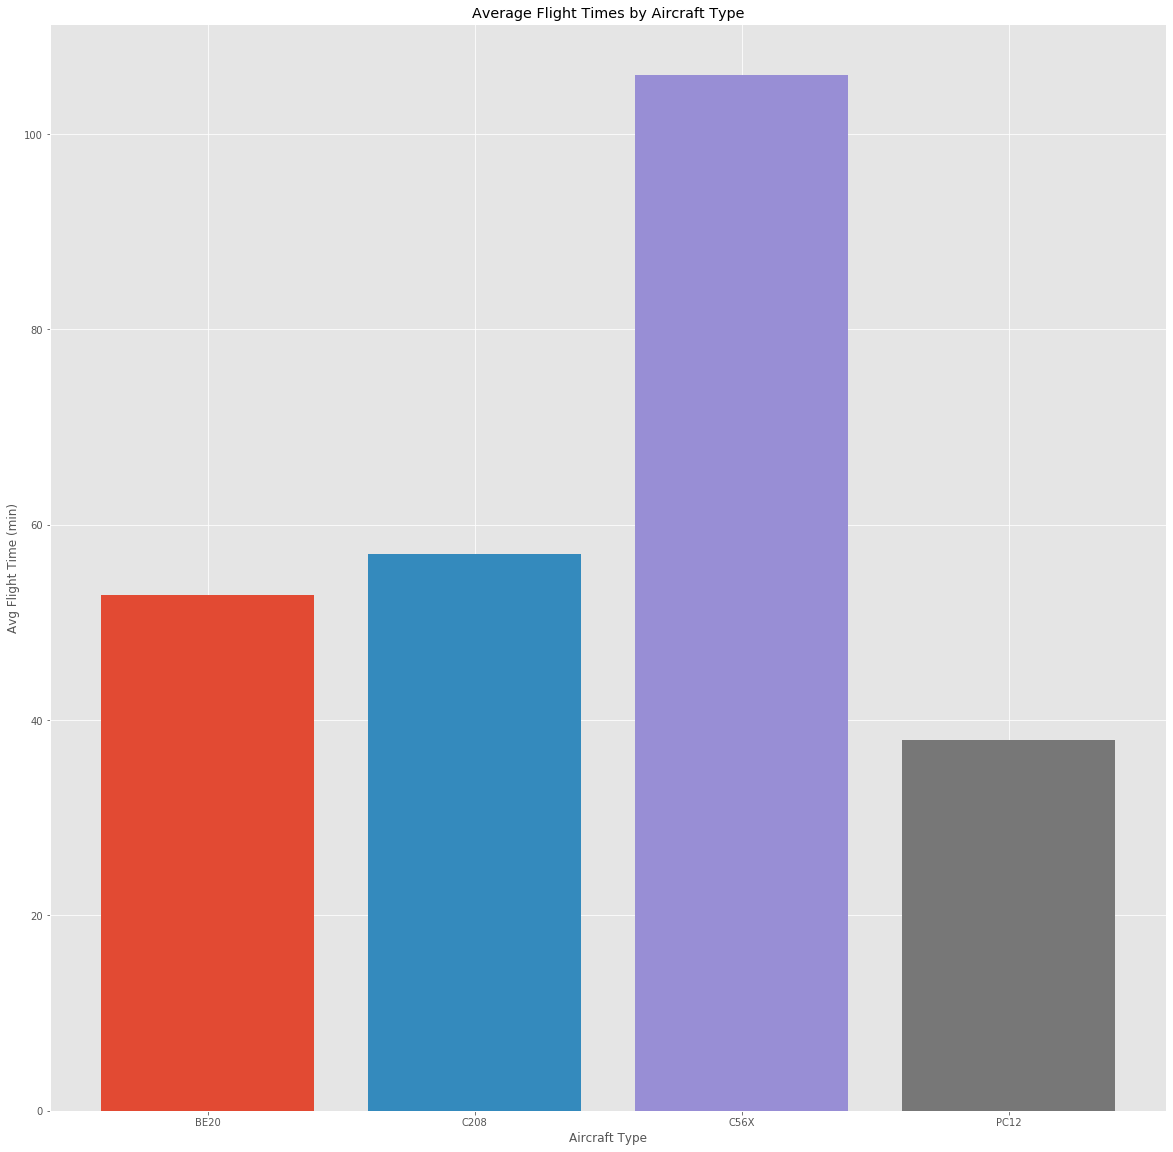

In [189]:

fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('Average Flight Times by Aircraft Type')
ax.set_xlabel('Aircraft Type')
ax.set_ylabel('Avg Flight Time (min)');
for k in sorted(aircraft_avg_dict):
    ax.bar(k,aircraft_avg_dict[k])
